# MultiVerse Coders
---

# Web Scraping of IMDB Website and Analysis of the Movies and Actors Datasets

## Introduction
The purpose of this project is to conduct web scraping on the IMDB website and accumulate data of 100 movies across different genres and 100 actors who have worked in those chosen 100 movies. The goal was to determine which genre were more profitable in particular decades. Additionally the project also explored into intricate relationship between popularity and ratings of movies.  It  will also unravel the significance of experience or talent for winning awards in the Hollywood industry.


## Importing Libraries

In [1]:
import pandas as pd
import requests
import re
import os
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np

## URL - Movies

In [2]:
# Comedy
urls = ['https://www.imdb.com/title/tt0089218/?ref_=sr_t_1',
        'https://www.imdb.com/title/tt0088763/?ref_=sr_t_2',
        'https://www.imdb.com/title/tt0093779/?ref_=sr_t_3',
        'https://www.imdb.com/title/tt0097165/?ref_=sr_t_4',
        'https://www.imdb.com/title/tt0094721/?ref_=sr_t_5',
        'https://www.imdb.com/title/tt0099785/?ref_=sr_t_7',
        'https://www.imdb.com/title/tt0099938/?ref_=sr_t_7',
        'https://www.imdb.com/title/tt0100758/?ref_=sr_t_4',
        'https://www.imdb.com/title/tt0099422/?ref_=sr_t_9',
        'https://www.imdb.com/title/tt0100140/?ref_=sr_t_10',
        'https://www.imdb.com/title/tt0250494/?ref_=sr_t_7',
        'https://www.imdb.com/title/tt1119646/?ref_=sr_t_12',
        'https://www.imdb.com/title/tt0382932/?ref_=sr_t_16',
        'https://www.imdb.com/title/tt0381707/?ref_=sr_t_4',
        'https://www.imdb.com/title/tt0198781/?ref_=sr_t_42'
        'https://www.imdb.com/title/tt7131622/?ref_=sr_t_1',
        'https://www.imdb.com/title/tt0993846/?ref_=sr_t_2',
        'https://www.imdb.com/title/tt4633694/?ref_=sr_t_28',
        'https://www.imdb.com/title/tt2283362/?ref_=sr_t_49',
        'https://www.imdb.com/title/tt3521164/?ref_=sr_t_8',
        'https://www.imdb.com/title/tt6139732/?ref_=sr_t_37',
        'https://www.imdb.com/title/tt6263850/?ref_=sr_t_16',
        'https://www.imdb.com/title/tt1517268/?ref_=sr_t_33',
        'https://www.imdb.com/title/tt7510222/?ref_=sr_t_59',
        'https://www.imdb.com/title/tt2049403/?ref_=sr_t_29',
        'https://www.imdb.com/title/tt6718170/?ref_=sr_t_75',
        # Horror
        'https://www.imdb.com/title/tt23289160/?ref_=sr_t_1',
        'https://www.imdb.com/title/tt8332922/?ref_=sr_t_6',
        'https://www.imdb.com/title/tt5040012/?ref_=sr_t_3',
        'https://www.imdb.com/title/tt17526714/?ref_=sr_t_4',
        'https://www.imdb.com/title/tt9764362/?ref_=sr_t_5',
        'https://www.imdb.com/title/tt3416742/?ref_=sr_t_6',
        'https://www.imdb.com/title/tt2545118/?ref_=sr_t_2',
        'https://www.imdb.com/title/tt7914416/?ref_=sr_t_7',
        'https://www.imdb.com/title/tt5052448/?ref_=sr_t_4',
        'https://www.imdb.com/title/tt5700672/?ref_=sr_t_5',
        'https://www.imdb.com/title/tt0365748/?ref_=sr_t_1',
        'https://www.imdb.com/title/tt1139797/?ref_=sr_t_2',
        'https://www.imdb.com/title/tt0144084/?ref_=sr_t_3',
        'https://www.imdb.com/title/tt0230600/?ref_=sr_t_4',
        'https://www.imdb.com/title/tt0387564/?ref_=sr_t_5',
        'https://www.imdb.com/title/tt0110148/?ref_=sr_t_1',
        'https://www.imdb.com/title/tt0109506/?ref_=sr_t_2',
        'https://www.imdb.com/title/tt0117571/?ref_=sr_t_6',
        'https://www.imdb.com/title/tt0103873/?ref_=sr_t_4',
        'https://www.imdb.com/title/tt0103874/?ref_=sr_t_5',
        'https://www.imdb.com/title/tt0082010/?ref_=sr_t_7',
        'https://www.imdb.com/title/tt0081505/?ref_=sr_t_2',
        'https://www.imdb.com/title/tt0091064/?ref_=sr_t_6',
        'https://www.imdb.com/title/tt0093773/?ref_=sr_t_4',
        'https://www.imdb.com/title/tt0092991/?ref_=sr_t_5',
        # Action
        'https://www.imdb.com/title/tt0095016/?ref_=ls_t_1',
        'https://www.imdb.com/title/tt0082971/?ref_=ls_t_2',
        'https://www.imdb.com/title/tt0087469/?ref_=ls_t_3',
        'https://www.imdb.com/title/tt0097576/?ref_=ls_t_4',
        'https://www.imdb.com/title/tt0082694/?ref_=ls_t_7',
        'https://www.imdb.com/title/tt0103064/?ref_=ls_t_1',
        'https://www.imdb.com/title/tt0102685/?ref_=ls_t_2',
        'https://www.imdb.com/title/tt0117500/?ref_=ls_t_3',
        'https://www.imdb.com/title/tt0111257/?ref_=ls_t_4',
        'https://www.imdb.com/title/tt0100802/?ref_=ls_t_5',
        'https://www.imdb.com/title/tt0325980/?ref_=ls_t_1',
        'https://www.imdb.com/title/tt0468569/?ref_=ls_t_2',
        'https://www.imdb.com/title/tt0381061/?ref_=ls_t_3',
        'https://www.imdb.com/title/tt0258463/?ref_=ls_t_4',
        'https://www.imdb.com/title/tt0372183/?ref_=ls_t_5',
        'https://www.imdb.com/title/tt1229238/?ref_=ls_t_6',
        'https://www.imdb.com/title/tt1074638/?ref_=ls_t_2',
        'https://www.imdb.com/title/tt2911666/?ref_=ls_t_3',
        'https://www.imdb.com/title/tt4425200/?ref_=ls_t_4',
        'https://www.imdb.com/title/tt6146586/?ref_=ls_t_5',
        'https://www.imdb.com/title/tt1745960/?ref_=ls_t_1',
        'https://www.imdb.com/title/tt6499752/?ref_=ls_t_2',
        'https://www.imdb.com/title/tt4912910/?ref_=ls_t_3',
        'https://www.imdb.com/title/tt2406566/?ref_=ls_t_3',
        'https://www.imdb.com/title/tt2381249/?ref_=ls_t_6',
        # Thriller
        'https://www.imdb.com/title/tt0094226/',
        'https://www.imdb.com/title/tt0090605/?ref_=sr_t_37',
        'https://www.imdb.com/title/tt1345836/?ref_=sr_t_3',
        'https://www.imdb.com/title/tt0114369/?ref_=sr_t_4',
        'https://www.imdb.com/title/tt0102926/?ref_=sr_t_5',
        'https://www.imdb.com/title/tt7286456/?ref_=sr_t_6',
        'https://www.imdb.com/title/tt1130884/?ref_=sr_t_7',
        'https://www.imdb.com/title/tt0482571/?ref_=sr_t_8',
        'https://www.imdb.com/title/tt2980592/?ref_=nm_flmg_knf_t_3',
        'https://www.imdb.com/title/tt0209144/?ref_=sr_t_10',
        'https://www.imdb.com/title/tt0110413/?ref_=sr_t_11',
        'https://www.imdb.com/title/tt0266697/?ref_=sr_t_12',
        'https://www.imdb.com/title/tt0434409/?ref_=sr_t_13',
        'https://www.imdb.com/title/tt0114814/',
        'https://www.imdb.com/title/tt1392190/?ref_=sr_t_15',
        'https://www.imdb.com/title/tt0105236/?ref_=sr_t_16',
        'https://www.imdb.com/title/tt2267998/?ref_=sr_t_17',
        'https://www.imdb.com/title/tt0477348/?ref_=sr_t_18',
        'https://www.imdb.com/title/tt0107290/?ref_=sr_t_19',
        'https://www.imdb.com/title/tt14858658/?ref_=fn_all_ttl_1',
        'https://www.imdb.com/title/tt6751668/?ref_=sr_t_21',
        'https://www.imdb.com/title/tt1392170/?ref_=sr_t_22',
        'https://www.imdb.com/title/tt26753003/',
        'https://www.imdb.com/title/tt1843866/?ref_=sr_t_24',
        'https://www.imdb.com/title/tt3315342/?ref_=sr_t_25']


headers = {'User-Agent': 'Mozilla/5.0'}

The project was designed with flexibility in mind, allowing for easy updates when needed. To streamline the process and avoid extracting movie data from multiple sections of the website, we focused on genre-organized webpages to gather all the necessary information. For our dataset of 100 movies, each genre—Comedy, Horror, Action, and Thriller—provided 25 links. If additional information needs to be pulled, one simply has to add the corresponding link above. 

## Retrieving Data - Movies

In [3]:
names = []
release_year = []
rating = []
duration = []
imdb_rating = []
popularity = []
genre_tags = []
star_actors = []
nominations = []
award_wins = []
budget = []
gross_worldwide = []

for url in urls:
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'lxml')
    name_1 = soup.title.string.strip()
    name_2 = name_1.split(" (")[0]
    names.append(name_2)

    release_year_1 = soup.title.string.strip()
    release_year_2 = re.search(r'\(([^)]+)\)', release_year_1)
    release_year.append(release_year_2.group(1) if release_year_2 else 'NA')

    rating_1 = soup.find('meta', property='og:description')
    if rating_1 and rating_1.get('content'):
        rating_2 = rating_1['content'].split('|')[-1].strip()
        rating.append(rating_2)

    duration_1 = soup.find('meta', property='og:description')
    if duration_1 and duration_1.get('content'):
        duration_2 = duration_1['content'].split('|')[0].strip()
        duration.append(duration_2)

    imdb_rating_1 = soup.find('meta', property='og:title')
    if imdb_rating_1 and imdb_rating_1.get('content'):
        imdb_rating_2 = imdb_rating_1['content'].split('|')[0].strip()
        imdb_rating_3 = imdb_rating_2.split('⭐')[-1].strip()
        imdb_rating.append(imdb_rating_3)

    popularity_1 = soup.find('div', class_='sc-39d285cf-1 dxqvqi')
    if popularity_1:
        popularity_2 = popularity_1.get_text(strip=True)
    else:
        popularity_2 = "None"
    popularity.append(popularity_2)

    genre_tags_1 = soup.find_all('span', class_='ipc-chip__text')[:3]
    genre_tags_2 = ", ".join(genre_tags_3.get_text(strip=True)
                             for genre_tags_3 in genre_tags_1)
    genre_tags.append(genre_tags_2)

    actors_1 = soup.find('meta', attrs={'name': 'description'})
    if actors_1 and actors_1.get('content'):
        actors_2 = actors_1['content'].split("With", 1)[1].split(".", 1)[0]
        actors_3 = ", ".join([actors_2.strip()
                             for actors_2 in actors_2.split(",")][:3])
        star_actors.append(actors_3)

    nomination_1 = soup.find(
        'span', attrs={'class': 'ipc-metadata-list-item__list-content-item'})
    nomination_2 = nomination_1.get_text(strip=True) if nomination_1 else ""
    nomination_3 = nomination_2.split("&")[1].split()[
        0] if "&" in nomination_2 else ""
    nominations.append(nomination_3)

    award_win_1 = soup.find(
        'span', attrs={'class': 'ipc-metadata-list-item__list-content-item'})
    award_win_2 = award_win_1.get_text(strip=True) if award_win_1 else ""
    award_win_3 = award_win_2.split("&")[0].strip().split()[
        0] if "&" in award_win_2 else ""
    award_wins.append(award_win_3)

    budget_1 = soup.find(
        'span', class_='ipc-metadata-list-item__label', string="Budget")
    if budget_1:
        budget_2 = budget_1.find_next(
            string=lambda t: t and t.strip() and t.strip()[0] in "$€£¥")
        budget_3 = budget_2.strip() if budget_2 else ""
    else:
        budget_3 = ""
    budget.append(budget_3)

    gross_worldwide_1 = soup.find(
        'span', class_='ipc-metadata-list-item__label', string="Gross worldwide")
    if gross_worldwide_1:
        gross_worldwide_2 = gross_worldwide_1.find_next(
            string=lambda t: t and t.strip().startswith('$'))
        gross_worldwide_3 = gross_worldwide_2.strip() if gross_worldwide_2 else ""
    else:
        gross_worldwide_3 = ""
    gross_worldwide.append(gross_worldwide_3)

After retrieving data from the provided links, we initialized empty lists for each movie feature. Then, a for loop iterates over each movie URL, using BeautifulSoup to extract and update the relevant feature list. The "response" line sends an HTTP GET request to the URL, and "soup" parses the returned text with the 'lxml' parser. These two lines, defined once at the start, are used for all features. By inspecting each URL, we were able to identify the specific tags and attributes that contained the necessary content.

- For the movie names, the code retrieves the text from the webpage's title tag, splits it at the sequence " (" to separate the name from any additional information, and takes the first element. It then appends this extracted name to the names list. 

- For the release year, the code first retrieves and trims the text from the title tag. It then uses a regular expression to find any text enclosed in parentheses. If a match is found, .group(1) extracts the content inside the parentheses, which is then appended to the release_year list.

- For both rating and duration, the code locates the first meta tag with the attribute 'og:description' using the find method, then checks if a content attribute exists. If it does, it extracts the string from content, splits it by the pipe (|) character, and selects either the last element (for rating) or the first element (for duration) after trimming any whitespace. The resulting value is then added to the corresponding list.

- For the IMDb rating, the code finds the meta tag with og:title, checks for a content attribute, then extracts the content string. It splits the string at the pipe (|), takes the first segment (after trimming), then splits that segment by the star symbol and takes the last element. This final value is appended to the IMDb rating list. 

- For popularity, the code locates the first div element with the class 'sc-39d285cf-1 dxqvqi'. If found, it extracts and trims its text content and appends that value to the popularity list.

- For the genres tag, the code first finds all span elements with the class 'ipc-chip__text' and selects the first three. It then extracts and trims the text from each element, joins them into a single comma-separated string, and appends this string to the list.

- For the actors, the code first locates the meta tag with the name "description" and ensures it has a content attribute. It then splits this content at the first occurrence of "With", and further splits the resulting string at the first period, taking the part before the period. This substring is then split by commas to extract individual actor names. The code trims each name, selects the first three, joins them into a single comma-separated string, and appends that string to the list.

- For both nominations and award wins, the code finds the first span element with the class 'ipc-metadata-list-item__list-content-item' and extracts the trimmed text. It then splits the text at the "&" character—selecting the second segment for nominations and the first for award wins—further splits that segment by whitespace, and takes the first word. The resulting value is appended to the respective list.

- For the budget code, it locates the span element with the class ipc-metadata-list-item__label whose content exactly matches "Budget". It then searches for the next string that is non-empty and starts with a currency symbol (one of "$€£¥"), trims any whitespace, and assigns the value to budget_3. The value is appended to the budget list.

- For the gross worldwide value, the code first locates the span element with the class ipc-metadata-list-item__label that exactly matches "Gross worldwide". It then finds the next text node whose stripped content starts with a dollar sign, trims any extra whitespace, and appends the result to the gross_worldwide list.


## Creating DataFrame - Movies

In [4]:
df_movies = pd.DataFrame({'movie': names, 'release_year': release_year, 'rating': rating, 'duration': duration,
                          'imdb_rating': imdb_rating, 'popularity': popularity, 'genre_tags': genre_tags,
                          'star_actors': star_actors, 'nominations': nominations, 'award_wins': award_wins, 'estimated_budget': budget, 'gross_worldwide': gross_worldwide})

In [5]:
df_movies.loc[:24, 'genre'] = 'Comedy'
df_movies.loc[25:49, 'genre'] = 'Horror'
df_movies.loc[50:74, 'genre'] = 'Action'
df_movies.loc[75:99, 'genre'] = 'Thriller'
df_movies[['genre_tags_1', 'genre_tags_2', 'genre_tags_3']
          ] = df_movies['genre_tags'].str.split(',', expand=True)
df_movies[['star_actors_1', 'star_actors_2', 'star_actors_3']
          ] = df_movies['star_actors'].str.split(',', expand=True)
df_movies['estimated_budget'] = df_movies['estimated_budget'].str.replace(
    r'\s*\(estimated\)', '', regex=True)
df_movies = df_movies.drop(['genre_tags', 'star_actors'], axis=1)
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   movie             100 non-null    object
 1   release_year      100 non-null    object
 2   rating            100 non-null    object
 3   duration          100 non-null    object
 4   imdb_rating       100 non-null    object
 5   popularity        100 non-null    object
 6   nominations       100 non-null    object
 7   award_wins        100 non-null    object
 8   estimated_budget  100 non-null    object
 9   gross_worldwide   100 non-null    object
 10  genre             100 non-null    object
 11  genre_tags_1      100 non-null    object
 12  genre_tags_2      100 non-null    object
 13  genre_tags_3      100 non-null    object
 14  star_actors_1     100 non-null    object
 15  star_actors_2     99 non-null     object
 16  star_actors_3     98 non-null     object
dtypes: object(17)
mem

After assembling lists for each feature, we created a dataframe with these features as columns. We then used the .loc[] function to assign specific genres to each block of movies. Since the genres and actors were originally concatenated into single strings, we split them into separate columns. For the estimated budget, we removed the word "estimated" to focus solely on the numeric values. Finally, we dropped the original genre and star actors columns after splitting them.

## URL - Actors

In [6]:
# Comedy
urls_actors = ['https://www.imdb.com/name/nm0000276/?ref_=nv_sr_srsg_0_tt_0_nm_8_in_0_q_Sean%2520Astin',
               'https://www.imdb.com/name/nm0000150/?ref_=nv_sr_srsg_0_tt_0_nm_8_in_0_q_Michael%2520J',
               'https://www.imdb.com/name/nm0000144/?ref_=nv_sr_srsg_0_tt_1_nm_7_in_0_q_Cary%2520Elwes',
               'https://www.imdb.com/name/nm0000245/?ref_=nv_sr_srsg_0_tt_5_nm_3_in_0_q_Robin%2520Williams',
               'https://www.imdb.com/name/nm0000285/?ref_=nv_sr_srsg_0_tt_6_nm_2_in_0_q_Alec%2520Baldwin',
               'https://www.imdb.com/name/nm0000346/?ref_=nv_sr_srsg_0_tt_4_nm_1_in_0_q_Macaulay%2520Culkin',
               'https://www.imdb.com/name/nm0000216/?ref_=nv_sr_srsg_0_tt_6_nm_2_in_0_q_Arnold%2520Schwarzenegger',
               'https://www.imdb.com/name/nm0387432/?ref_=nv_sr_srsg_0_tt_1_nm_7_in_0_q_Judith%2520Hoag',
               'https://www.imdb.com/name/nm0000886/?ref_=nv_sr_srsg_0_tt_1_nm_7_in_0_q_Warren%2520Beatty',
               'https://www.imdb.com/name/nm0000333/?ref_=nv_sr_srsg_0_tt_2_nm_6_in_0_q_Cher',
               'https://www.imdb.com/name/nm0000702/?ref_=nv_sr_srsg_0_tt_7_nm_1_in_0_q_Reese%2520Witherspoon',
               'https://www.imdb.com/name/nm0177896/?ref_=nv_sr_srsg_0_tt_2_nm_6_in_0_q_%2509Bradley%2520Cooper',
               'https://www.imdb.com/name/nm0652663/?ref_=nv_sr_srsg_0_tt_7_nm_1_in_0_q_Patton%2520Oswalt',
               'https://www.imdb.com/name/nm0915465/?ref_=nv_sr_srsg_0_tt_0_nm_8_in_0_q_Shawn%2520Wayans',
               'https://www.imdb.com/name/nm0000422/?ref_=nv_sr_srsg_0_tt_3_nm_5_in_0_q_John%2520Goodman',
               'https://www.imdb.com/name/nm0000138/?ref_=nv_sr_srsg_0_tt_7_nm_1_in_0_q_Leonardo%2520DiCaprio',
               'https://www.imdb.com/name/nm4271336/?ref_=nv_sr_srsg_0_tt_4_nm_2_in_0_q_Shameik%2520Moore',
               'https://www.imdb.com/name/nm0425005/?ref_=nv_sr_srsg_0_tt_3_nm_5_in_0_q_Dwayne%2520Johnson',
               'https://www.imdb.com/name/nm7635388/?ref_=nv_sr_srsg_0_tt_3_nm_5_in_0_q_Auli%27i%2520Cravalho',
               'https://www.imdb.com/name/nm0000226/?ref_=nv_sr_srsg_1_tt_4_nm_3_in_0_q_Will%2520Smith',
               'https://www.imdb.com/name/nm0005351/?ref_=nv_sr_srsg_0_tt_4_nm_4_in_0_q_Ryan%2520Reynolds',
               'https://www.imdb.com/name/nm3053338/?ref_=nv_sr_srsg_0_tt_7_nm_1_in_0_q_Margot%2520Robbie',
               'https://www.imdb.com/name/nm0136797/?ref_=nv_sr_srsg_0_tt_6_nm_2_in_0_q_Steve%2520Carell',
               'https://www.imdb.com/name/nm0000474/?ref_=nv_sr_srsg_0_tt_2_nm_6_in_0_q_Michael%2520Keaton',
               'https://www.imdb.com/name/nm0724656/?ref_=nv_sr_srsg_0_tt_0_nm_8_in_0_q_Kevin%2520Michael%2520Richardson',
               # Horror
               'https://www.imdb.com/name/nm4947538/?ref_=fn_all_nme_1',
               'https://www.imdb.com/name/nm8075925/?ref_=nv_sr_srsg_0_tt_0_nm_1_in_0_q_Millicent%2520Simmonds',
               'https://www.imdb.com/name/nm6675440/?ref_=fn_all_nme_1',
               'https://www.imdb.com/name/nm11670318/?ref_=nv_sr_srsg_4_tt_4_nm_3_in_0_q_Demi%2520Moore',
               'https://www.imdb.com/name/nm0000146/?ref_=nv_sr_srsg_1_tt_3_nm_4_in_0_q_Ralph%2520Fiennes',
               'https://www.imdb.com/name/nm1318596/?ref_=nv_sr_srsg_0_tt_2_nm_6_in_0_q_Jemaine%2520Clement%2509',
               'https://www.imdb.com/name/nm5747280/?ref_=nv_sr_srsg_0_tt_5_nm_3_in_0_q_Tilikum',
               'https://www.imdb.com/name/nm9576872/?ref_=nv_sr_srsg_0_tt_0_nm_8_in_0_q_Takayuki%2520Hamatsu',
               'https://www.imdb.com/name/nm2257207/?ref_=nv_sr_srsg_1_tt_0_nm_6_in_0_q_Daniel%2520Kaluuya',
               'https://www.imdb.com/name/nm1508003/?ref_=nv_sr_srsg_0_tt_3_nm_5_in_0_q_Gong%2520Yoo',
               'https://www.imdb.com/name/nm0670408/?ref_=fn_all_nme_1',
               'https://www.imdb.com/name/nm2968765/?ref_=nv_sr_srsg_0_tt_0_nm_1_in_0_q_K%25C3%25A5re%2520Hedebrant%2509Lina%2520',
               'https://www.imdb.com/name/nm0524197/?ref_=nv_sr_srsg_0_tt_1_nm_7_in_0_q_Josh%2520Lucas',
               'https://www.imdb.com/name/nm0001172/?ref_=nv_sr_srsg_0_tt_3_nm_5_in_0_q_Christopher%2520Eccleston',
               'https://www.imdb.com/name/nm1191481/?ref_=nv_sr_srsg_0_tt_2_nm_2_in_0_q_Leigh%2520Whannell',
               'https://www.imdb.com/name/nm0566114/?ref_=nv_sr_srsg_0_tt_0_nm_6_in_0_q_Virginia%2520McCollam',
               'https://www.imdb.com/name/nm0000488/?ref_=nv_sr_srsg_0_tt_0_nm_8_in_0_q_brandon%2520lee',
               'https://www.imdb.com/name/nm0413996/?ref_=nv_sr_srsg_0_tt_0_nm_8_in_0_q_Roger%2520Jackson',
               'https://www.imdb.com/name/nm0050975/?ref_=nv_sr_srsg_0_tt_0_nm_8_in_0_q_Timothy%2520Balme',
               'https://www.imdb.com/name/nm0000198/?ref_=nv_sr_srsg_1_tt_2_nm_5_in_0_q_Gary%2520Oldman',
               'https://www.imdb.com/name/nm0001162/?ref_=nv_sr_srsg_0_tt_0_nm_8_in_0_q_Griffin%20Dunne',
               'https://www.imdb.com/name/nm0001167/?ref_=nv_sr_srsg_0_tt_7_nm_1_in_0_q_Shelley%2520Duvall',
               'https://www.imdb.com/name/nm0000156/?ref_=nv_sr_srsg_0_tt_6_nm_2_in_0_q_Jeff%2520Goldblum',
               'https://www.imdb.com/name/nm0001990/?ref_=nv_sr_srsg_0_tt_0_nm_8_in_0_q_Elpidia%2520Carrillo',
               'https://www.imdb.com/name/nm0132257/?ref_=nv_sr_srsg_0_tt_1_nm_7_in_0_q_Bruce%2520Campbell',
               # Action
               'https://www.imdb.com/name/nm0000889/?ref_=nv_sr_srsg_3_tt_1_nm_7_in_0_q_bonnie',
               'https://www.imdb.com/name/nm0000148/?ref_=nv_sr_srsg_0_tt_4_nm_4_in_0_q_Harrison%2520Ford',
               'https://www.imdb.com/name/nm0293550/?ref_=fn_all_nme_1',
               'https://www.imdb.com/name/nm0000261/?ref_=nv_sr_srsg_0_tt_1_nm_7_in_0_q_Karen%2520Allen',
               'https://www.imdb.com/name/nm0702841/?ref_=nv_sr_srsg_0_tt_6_nm_2_in_0_q_Ke%2520Huy%2520Quan',
               'https://www.imdb.com/name/nm0000125/',
               'https://www.imdb.com/name/nm0817748/?ref_=ls_li_2',
               'https://www.imdb.com/name/nm0000157/?ref_=fn_all_nme_1',
               'https://www.imdb.com/name/nm0000411/?ref_=nv_sr_srsg_0_tt_7_nm_1_in_0_q_%2520%2520%2520%2520%27Edward%2520Furlong%27',
               'https://www.imdb.com/name/nm0000997/?ref_=fn_all_nme_1',
               'https://www.imdb.com/name/nm0000115/?ref_=nv_sr_srsg_0_tt_7_nm_1_in_0_q_Nicolas%2520Cage',
               'https://www.imdb.com/name/nm0000232/?ref_=nv_sr_srsg_0_tt_6_nm_2_in_0_q_Sharon%2520Stone',
               'https://www.imdb.com/name/nm0001691/?ref_=nv_sr_srsg_0_tt_6_nm_2_in_0_q_Geoffrey%2520Rush',
               'https://www.imdb.com/name/nm0089217/?ref_=fn_all_nme_1',
               'https://www.imdb.com/name/nm0005132/?ref_=fn_all_nme_1',
               'https://www.imdb.com/name/nm0001173/?ref_=fn_all_nme_1',
               'https://www.imdb.com/name/nm1200692/?ref_=nv_sr_srsg_0_tt_0_nm_8_in_0_q_Eva%2520Green',
               'https://www.imdb.com/name/nm0586568/?ref_=nv_sr_srsg_0_tt_3_nm_5_in_0_q_Mads%2520Mikkelsen',
               'https://www.imdb.com/name/nm0004376/?ref_=nv_sr_srsg_0_tt_1_nm_4_in_0_q_Franka%2520Potente%2509',
               'https://www.imdb.com/name/nm0177933/?ref_=nv_sr_srsg_0_tt_1_nm_7_in_0_q_Chris%2520Cooper',
               'https://www.imdb.com/name/nm0000129/?ref_=nv_sr_srsg_0_tt_5_nm_3_in_0_q_Tom%20Cruise%09',
               'https://www.imdb.com/name/nm0001132/?ref_=fn_all_nme_1',
               'https://www.imdb.com/name/nm0638824/?ref_=nv_sr_srsg_0_tt_1_nm_1_in_0_q_Michael%2520Nyqvist',
               'https://www.imdb.com/name/nm1249052/?ref_=nv_sr_srsg_0_tt_0_nm_1_in_0_q_Riccardo%2520Scamarcio%2509',
               'https://www.imdb.com/name/nm0000932/?ref_=nv_sr_srsg_1_tt_2_nm_5_in_0_q_Halle%2520Berry',
               # Thriller
               'https://www.imdb.com/name/nm0000126/?ref_=tt_ov_st_1',
               'https://www.imdb.com/name/nm0000244/?ref_=tt_ov_st_1',
               'https://www.imdb.com/name/nm0000288/?ref_=tt_ov_st_1',
               'https://www.imdb.com/name/nm0000151/?ref_=tt_ov_st_1',
               'https://www.imdb.com/name/nm0000149/?ref_=tt_ov_st_1',
               'https://www.imdb.com/name/nm0001618/?ref_=tt_ov_st_1',
               'https://www.imdb.com/name/nm0607865/?ref_=tt_ov_st_2',
               'https://www.imdb.com/name/nm0000323/?ref_=ttfc_fc_cl_t3',
               'https://www.imdb.com/name/nm2140860/?ref_=tt_ov_st_1',
               'https://www.imdb.com/name/nm0001602/?ref_=tt_ov_st_1',
               'https://www.imdb.com/name/nm0000606/?ref_=tt_ov_st_1',
               'https://www.imdb.com/name/nm0000235/?ref_=tt_ov_st_1',
               'https://www.imdb.com/name/nm0000204/?ref_=tt_ov_st_2',
               'https://www.imdb.com/name/nm0000286/?ref_=tt_cst_t_4',
               'https://www.imdb.com/name/nm0362766/?ref_=tt_ov_st_1',
               'https://www.imdb.com/name/nm0000172/?ref_=tt_ov_st_1',
               'https://www.imdb.com/name/nm0000255/?ref_=tt_ov_st_1',
               'https://www.imdb.com/name/nm0000169/?ref_=tt_ov_st_1',
               'https://www.imdb.com/name/nm0000554/?ref_=tt_ov_st_1',
               'https://www.imdb.com/name/nm7609875/?ref_=tt_ov_st_1',
               'https://www.imdb.com/name/nm0814280/?ref_=tt_ov_st_1',
               'https://www.imdb.com/name/nm0001804/?ref_=tt_cst_t_4',
               'https://www.imdb.com/name/nm0000246/?ref_=tt_ov_st_1',
               'https://www.imdb.com/name/nm0262635/?ref_=tt_ov_st_1',
               'https://www.imdb.com/name/nm0413168/?ref_=tt_ov_st_1']

credit_roles = ["Actor", "Producer", "Soundtrack", "Writer", "Director",
                "Additional Crew", "Self", "Thanks", "Archive Footage",
                "Archive Sound", "Music Department"]

headers = {'User-Agent': 'Mozilla/5.0'}

We used the same approach here. To streamline data collection and avoid scraping movie information from various sections of the website, we targeted webpages organized by actors and genres. For our dataset of 100 actors, each actor-genre category—Comedy, Horror, Action, and Thriller—provided 25 links. If more information is needed, simply add the appropriate link.

## Retrieving Data - Actors

In [7]:
name_actor = []
credits = []
award_nomination = []
award_wins = []

for url in urls_actors:
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'lxml')
    names_1 = soup.title.string.strip()
    names_2 = names_1.split(" - ")[0]
    name_actor.append(names_2)

    credits.append(sum(int(tag.select_one('span.ipc-chip__count').get_text(strip=True))
                       for credit in credit_roles
                       for tag in soup.select('span.ipc-chip__text')
                       if credit in tag.get_text() and tag.select_one('span.ipc-chip__count')))

    award_nomination_1 = soup.find(
        'span', attrs={'class': 'ipc-metadata-list-item__list-content-item'})
    award_nomination_2 = award_nomination_1.get_text(
        strip=True) if award_nomination_1 else ""
    award_nomination_3 = award_nomination_2.split(
        "&")[1].split()[0] if "&" in award_nomination_2 else "None"
    award_nomination.append(award_nomination_3)

    award_wins_1 = soup.find(
        'span', attrs={'class': 'ipc-metadata-list-item__list-content-item'})
    award_wins_2 = award_wins_1.get_text(strip=True) if award_wins_1 else ""
    award_wins_3 = award_wins_2.split("&")[0].strip().split()[
        0] if "&" in award_wins_2 else "None"
    award_wins.append(award_wins_3)

After retrieving data from the provided links, we initialized empty lists for each feature. Then, a for loop iterates over each movie URL, using BeautifulSoup to extract and update the relevant feature list. The "response" line sends an HTTP GET request to the URL, and "soup" parses the returned text with the 'lxml' parser. These two lines, defined once at the start, are used for all features. By inspecting each URL, we were able to identify the specific tags and attributes that contained the necessary content.

- For the name of actors feature, the code retrieves the title text, removes whitespaces, splits the text at " - ", and takes the first segment. It then appends this name to the respective list.

- For the credits feature, we first defined a list of credit roles as keywords to identify relevant credits. The code then iterates over each credit role and every span element with the class ipc-chip__text. For each tag that mentions the role and includes a nested span with the class ipc-chip__count, it extracts the count, trims whitespace, converts it to an integer, and sums all these values. Finally, the total is appended to the credits list.

- For both nominations and award wins, the code finds the first span element with the class 'ipc-metadata-list-item__list-content-item' and extracts the trimmed text. It then splits the text at the "&" character—selecting the second segment for nominations and the first for award wins—further splits that segment by whitespace, and takes the first word. The resulting value is appended to the respective list.

## Creating DataFrame - Actors

In [8]:
df_actors = pd.DataFrame({'name': name_actor, 'number_credits': credits,
                         'number_award_nominations': award_nomination, 'number_award_wins': award_wins})


df_actors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   name                      100 non-null    object
 1   number_credits            100 non-null    int64 
 2   number_award_nominations  100 non-null    object
 3   number_award_wins         100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


After assembling lists for each feature, we created a dataframe with these features as columns.

## EDA - Movies

In [9]:
df_movies_adjusted = df_movies
df_movies_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   movie             100 non-null    object
 1   release_year      100 non-null    object
 2   rating            100 non-null    object
 3   duration          100 non-null    object
 4   imdb_rating       100 non-null    object
 5   popularity        100 non-null    object
 6   nominations       100 non-null    object
 7   award_wins        100 non-null    object
 8   estimated_budget  100 non-null    object
 9   gross_worldwide   100 non-null    object
 10  genre             100 non-null    object
 11  genre_tags_1      100 non-null    object
 12  genre_tags_2      100 non-null    object
 13  genre_tags_3      100 non-null    object
 14  star_actors_1     100 non-null    object
 15  star_actors_2     99 non-null     object
 16  star_actors_3     98 non-null     object
dtypes: object(17)
mem

In [10]:
df_movies_adjusted = df_movies_adjusted.drop('duration', axis=1)

In [11]:
df_movies_adjusted.head()

,movie,release_year,rating,imdb_rating,popularity,nominations,award_wins,estimated_budget,gross_worldwide,genre,genre_tags_1,genre_tags_2,genre_tags_3,star_actors_1,star_actors_2,star_actors_3
0,The Goonies,1985,PG,7.7,70,7,4,"$19,000,000","$64,532,020",Comedy,Quest,Teen Adventure,Teen Comedy,Sean Astin,Josh Brolin,Jeff Cohen
1,Back to the Future,1985,PG,8.5,246,25,27,"$19,000,000","$385,053,307",Comedy,High-Concept Comedy,Teen Adventure,Teen Comedy,Michael J,None,None
2,The Princess Bride,1987,PG,8.0,249,11,7,"$16,000,000","$30,966,669",Comedy,Adventure Epic,Fairy Tale,Fantasy Epic,Cary Elwes,Mandy Patinkin,Chris Sarandon
3,Dead Poets Society,1989,PG,8.1,432,19,20,"$16,400,000","$235,860,116",Comedy,Coming-of-Age,Teen Drama,Comedy,Robin Williams,Robert Sean Leonard,Ethan Hawke
4,Beetlejuice,1988,PG,7.5,514,11,7,"$15,000,000","$74,852,535",Comedy,Dark Comedy,Dark Fantasy,Quirky Comedy,Alec Baldwin,Geena Davis,Annie McEnroe


In [12]:
print(df_movies_adjusted.duplicated().sum())
print(df_movies_adjusted['movie'].duplicated().sum())
print((df_movies_adjusted['popularity'] == "None").sum())

0
0
2


In [13]:
df_movies_adjusted['release_year'] = df_movies_adjusted['release_year'].astype(
    'int')


df_movies_adjusted['imdb_rating'] = df_movies_adjusted['imdb_rating'].astype(
    'float')


df_movies_adjusted['popularity'] = (pd.to_numeric(df_movies_adjusted['popularity'].astype(
    str).str.replace('None', ''), errors='coerce').fillna(0).astype(int))


df_movies_adjusted['award_wins'] = df_movies_adjusted['award_wins'].astype(
    'int')
df_movies_adjusted['release_year'] = df_movies_adjusted['release_year'].astype(
    'int')
df_movies_adjusted['nominations'] = df_movies_adjusted['nominations'].astype(
    'int')


print((df_movies_adjusted['popularity'] == "None").sum())

0


In [14]:
df_movies_adjusted['estimated_budget'] = df_movies_adjusted['estimated_budget'].astype(
    str).str.replace(r'[$¥£]', '', regex=True)


df_movies_adjusted['estimated_budget'] = df_movies_adjusted['estimated_budget'].astype(
    str).str.replace(',', '').astype(int)


df_movies_adjusted['gross_worldwide'] = df_movies_adjusted['gross_worldwide'].astype(
    str).str.replace(r'[$¥£]', '', regex=True)


df_movies_adjusted['gross_worldwide'] = df_movies_adjusted['gross_worldwide'].astype(
    str).str.replace(',', '').astype(int)

In [15]:
df_movies_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie             100 non-null    object 
 1   release_year      100 non-null    int64  
 2   rating            100 non-null    object 
 3   imdb_rating       100 non-null    float64
 4   popularity        100 non-null    int64  
 5   nominations       100 non-null    int64  
 6   award_wins        100 non-null    int64  
 7   estimated_budget  100 non-null    int64  
 8   gross_worldwide   100 non-null    int64  
 9   genre             100 non-null    object 
 10  genre_tags_1      100 non-null    object 
 11  genre_tags_2      100 non-null    object 
 12  genre_tags_3      100 non-null    object 
 13  star_actors_1     100 non-null    object 
 14  star_actors_2     99 non-null     object 
 15  star_actors_3     98 non-null     object 
dtypes: float64(1), int64(6), object(9)
memory usa

In [16]:
df_movies_adjusted['return'] = (
    (df_movies_adjusted['gross_worldwide']/df_movies_adjusted['estimated_budget']-1)).round(1)

In [17]:
df_movies_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movie             100 non-null    object 
 1   release_year      100 non-null    int64  
 2   rating            100 non-null    object 
 3   imdb_rating       100 non-null    float64
 4   popularity        100 non-null    int64  
 5   nominations       100 non-null    int64  
 6   award_wins        100 non-null    int64  
 7   estimated_budget  100 non-null    int64  
 8   gross_worldwide   100 non-null    int64  
 9   genre             100 non-null    object 
 10  genre_tags_1      100 non-null    object 
 11  genre_tags_2      100 non-null    object 
 12  genre_tags_3      100 non-null    object 
 13  star_actors_1     100 non-null    object 
 14  star_actors_2     99 non-null     object 
 15  star_actors_3     98 non-null     object 
 16  return            100 non-null    float64
dty

For the exploratory data analysis on the movies dataframe, we dropped the unused duration feature and checked for duplicates. We found two duplicates in the popularity column, which were essentially None values, and replaced them with zero. Next, we adjusted the datatypes and removed the currency symbols from both the gross worldwide and estimated budget features. Lastly, we created a new column named "return" to calculate the return on investment (ROI) for each movie as a multiplier, computed as (gross_worldwide / estimated_budget - 1) and rounded to one decimal place.

## EDA - Actors

In [18]:
df_actors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   name                      100 non-null    object
 1   number_credits            100 non-null    int64 
 2   number_award_nominations  100 non-null    object
 3   number_award_wins         100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


In [19]:
df_actors.isna().sum()

name                        0
number_credits              0
number_award_nominations    0
number_award_wins           0
dtype: int64

In [20]:
df_actors['number_award_nominations'] = pd.to_numeric(
    df_actors['number_award_nominations'], errors='coerce').fillna(0).astype(int)
df_actors['number_award_wins'] = pd.to_numeric(
    df_actors['number_award_wins'], errors='coerce').fillna(0).astype(int)

In [21]:
df_actors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   name                      100 non-null    object
 1   number_credits            100 non-null    int64 
 2   number_award_nominations  100 non-null    int64 
 3   number_award_wins         100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.2+ KB


In [22]:
print(df_actors.duplicated().sum())
print(df_actors['name'].duplicated().sum())

0
0


In [23]:
df_actors_credits = df_actors.sort_values(
    by='number_credits', ascending=False)
display(df_actors_credits.head())

,name,number_credits,number_award_nominations,number_award_wins
6,Arnold Schwarzenegger,990,37,32
19,Will Smith,959,187,97
17,Dwayne Johnson,947,79,22
9,Cher,766,92,53
3,Robin Williams,765,86,66


In [24]:
df_actors_nominations = df_actors.sort_values(
    by='number_award_nominations', ascending=False)
display(df_actors_nominations.head())

,name,number_credits,number_award_nominations,number_award_wins
11,Bradley Cooper,380,286,72
15,Leonardo DiCaprio,528,286,108
80,Joaquin Phoenix,254,200,71
19,Will Smith,959,187,97
71,Judi Dench,359,186,71


In [25]:
df_actors_wins = df_actors.sort_values(
    by='number_award_wins', ascending=False)
display(df_actors_wins.head())

,name,number_credits,number_award_nominations,number_award_wins
15,Leonardo DiCaprio,528,286,108
19,Will Smith,959,187,97
87,Natalie Portman,356,182,96
77,Christian Bale,284,133,84
64,Heath Ledger,155,67,84


For the exploratory data analysis on the actors dataframe, we checked for duplicates. There were no duplicates in this dataset. Next, there were some None values, so we changed the datatypes of 'number_award_nominations' and 'number_award_wins' columns from object to int and using fillna changed the None to 0. For ease of answering our question, I created three new dataset, each of them them are sorted based on the values of three different columns. 

## Chart - Movies

### What is the median return on a movie, and how has it evolved over time?

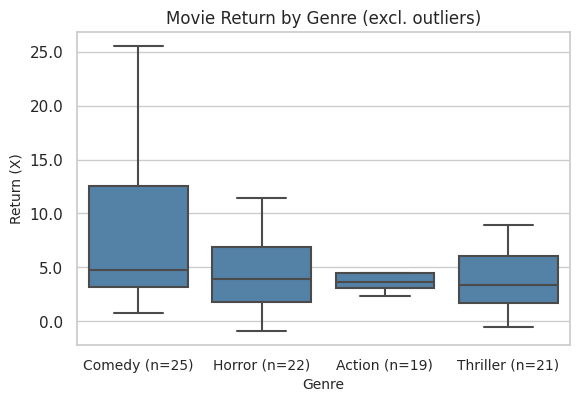

In [26]:
sns.set(style="whitegrid")
genre_counts = {"Comedy": 25, "Horror": 22, "Action": 19, "Thriller": 21}
order = ["Comedy", "Horror", "Action", "Thriller"]
new_labels = [f"{genre} (n={genre_counts[genre]})" for genre in order]
sns.set_theme(style="whitegrid")
plt.figure(figsize=(6, 4))
ax = sns.boxplot(data=df_movies_adjusted, x='genre', y='return',
                 order=order, showfliers=False, palette=['steelblue'])
ax.set_xticklabels(new_labels, rotation=0, fontsize=10)
formatter = mticker.FuncFormatter(lambda x, pos: f'{x:,.1f}')
ax.yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.title("Movie Return by Genre (excl. outliers)", fontsize=12)
plt.xlabel("Genre", fontsize=10)
plt.ylabel("Return (X)", fontsize=10)
plt.show()

The box plot above displays the consolidated ROI across various movie genres. After excluding outliers, Comedy leads with an ROI of 4.8X, followed by Horror at 3.4X, Action at 3.3X, and Thriller at 3.0X. Notably, some Horror and Thriller films posted negative returns, indicating losses. This chart illustrates that overall industry returns are highly sensitive to genre and blockbuster status. However, it's important to note that this analysis is based on a sample of fewer than 100 movies, so greater variability may exist and the findings may not fully represent the broader population. 


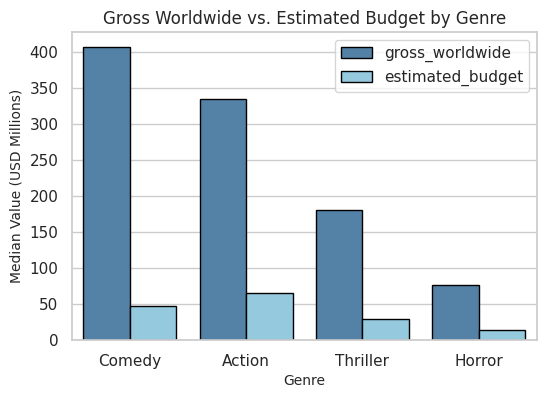

In [27]:
grouped = df_movies_adjusted.groupby(
    "genre")[["gross_worldwide", "estimated_budget"]].median().reset_index()


grouped = grouped.sort_values("gross_worldwide", ascending=False)


order = grouped["genre"].tolist()
data_long = grouped.melt(


    id_vars="genre",


    value_vars=["gross_worldwide", "estimated_budget"],


    var_name="Measure",


    value_name="Value")


sns.set_theme(style="whitegrid")


plt.figure(figsize=(6, 4))


ax = sns.barplot(data=data_long, x="genre", y="Value", hue="Measure",
                 order=order, palette=["steelblue", "skyblue"], edgecolor="black")


plt.title("Gross Worldwide vs. Estimated Budget by Genre", fontsize=12)


plt.xlabel("Genre", fontsize=10)


plt.ylabel("Median Value (USD Millions)", fontsize=10)


formatter = mticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}')


ax.yaxis.set_major_formatter(formatter)
plt.legend()


plt.show()

The bar chart displays both gross worldwide revenue and estimated budgets for each genre. In our sample, although comedies had the second highest estimated budget, they achieved the highest worldwide gross, which contributed to the top ROI as shown in the boxplot. In contrast, action films, despite having the second highest gross revenue, suffered from the highest production costs, resulting in a lower ROI and a third-place ranking in the boxplot. Horror films, while generating the least gross revenue, benefited from the lowest production costs, securing the second highest ROI, whereas thrillers, with third-highest sales but higher budgets, ranked lower in ROI. Although this sample is small and may not fully represent the broader market, the initial results suggest that comedies tend to perform well in return metrics due to their lower production costs and broad audience appeal.

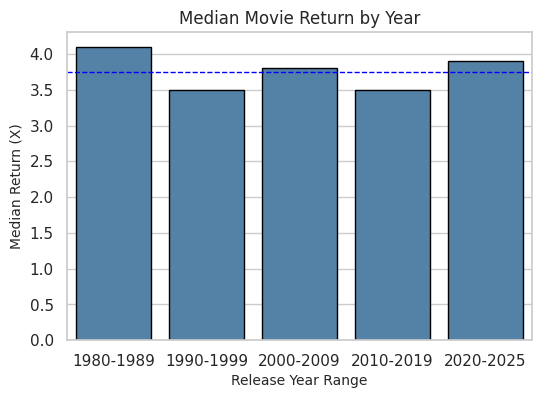

In [28]:
bins = [1980, 1990, 2000, 2010, 2020, 2026]
labels = ["1980-1989", "1990-1999", "2000-2009", "2010-2019", "2020-2025"]
df_movies_adjusted["year_range"] = pd.cut(
    df_movies_adjusted["release_year"],
    bins=bins,
    labels=labels,
    right=False)

grouped = df_movies_adjusted.groupby(
    "year_range")["return"].median().reset_index()
sns.set_theme(style="whitegrid")
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=grouped, x="year_range", y="return",
                 palette=["steelblue"], edgecolor="black")
formatter = mticker.FuncFormatter(lambda x, pos: f'${x:,.0f}')
ax.yaxis.set_major_formatter(formatter)
median_return = np.median(df_movies_adjusted["return"].dropna())
ax.axhline(median_return, color='blue', linestyle='--', linewidth=1,
           label=f'Median Return (${median_return:,.0f})')
plt.title("Median Movie Return by Year", fontsize=12)
plt.xlabel("Release Year Range", fontsize=10)
plt.ylabel("Median Return (X)", fontsize=10)
formatter = mticker.FuncFormatter(lambda x, pos: f'{x:,.1f}')
ax.yaxis.set_major_formatter(formatter)
plt.show()

The bar chart illustrates the median ROI across various years, with the blue dotted line indicating the overall median for all genres and years combined. From left to right, it’s clear that movie ROI has steadily declined over time. In the 1980s, the median ROI was around 4.0X, but it fell to 3.5X during the 1990s and 2010s—below the overall median of 3.6X. Although there has been some recovery in the last five years, ROI remains lower than the levels observed in earlier decades. While these insights come from a limited sample, they likely reflect factors such as rising production costs, the influence of streaming services, evolving consumer behavior, and reduced theatrical attendance on ROI.   

### What relationships exist between different movie attributes, and how do they influence commercial success?

In [29]:
df_corr_movies = df_movies_adjusted.dropna()

In [30]:
df_corr_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 99
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   movie             98 non-null     object  
 1   release_year      98 non-null     int64   
 2   rating            98 non-null     object  
 3   imdb_rating       98 non-null     float64 
 4   popularity        98 non-null     int64   
 5   nominations       98 non-null     int64   
 6   award_wins        98 non-null     int64   
 7   estimated_budget  98 non-null     int64   
 8   gross_worldwide   98 non-null     int64   
 9   genre             98 non-null     object  
 10  genre_tags_1      98 non-null     object  
 11  genre_tags_2      98 non-null     object  
 12  genre_tags_3      98 non-null     object  
 13  star_actors_1     98 non-null     object  
 14  star_actors_2     98 non-null     object  
 15  star_actors_3     98 non-null     object  
 16  return            98 non-nul

In [31]:
df_corr_movies.isna().sum()

movie               0
release_year        0
rating              0
imdb_rating         0
popularity          0
nominations         0
award_wins          0
estimated_budget    0
gross_worldwide     0
genre               0
genre_tags_1        0
genre_tags_2        0
genre_tags_3        0
star_actors_1       0
star_actors_2       0
star_actors_3       0
return              0
year_range          0
dtype: int64

In [32]:
num_cols_corr = ['imdb_rating', 'popularity', 'nominations',
                 'award_wins', 'estimated_budget', 'gross_worldwide']

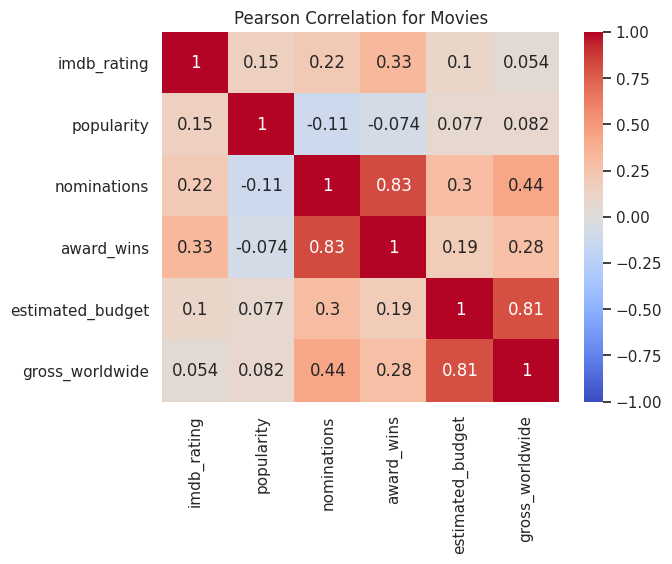

In [33]:
corr_matrix = df_corr_movies[num_cols_corr].corr(method='pearson')

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation for Movies')
plt.show()

#### Observations from the Pearson Correlation Matrix

1. **Budget and Revenue Relationship:**
   - There is a strong positive correlation (**0.81**) between a movie's *estimated budget* and its *gross worldwide* revenue. This suggests that movies with higher production budgets tend to generate more revenue at the box office.

2. **Moderate Link Between Nominations and Financial Success:**
   - *Nominations* are moderately correlated with *gross worldwide* revenue (**0.44**), indicating that critically recognized movies often achieve better financial performance, though the relationship is not as strong as the budget-to-revenue link.

3. **Weak Correlation Between Popularity and Ratings:**
   - The correlation between *IMDb ratings* and *popularity* is weak (**0.12**), implying that popular movies do not necessarily receive higher ratings from critics or audiences.

4. **Awards and Nominations Correlation:**
   - There is a very strong positive correlation (**0.83**) between *award wins* and *nominations*, which is expected as movies with more nominations are more likely to win awards.

5. **Minimal Relationship Between Ratings and Revenue:**
   - The correlation between *IMDb ratings* and *gross worldwide* revenue is very weak (**0.054**), suggesting that higher-rated movies do not necessarily translate into higher box office earnings.

6. **Negative Correlation Between Popularity and Critical Recognition:**
   - *Popularity* shows a slight negative correlation with both *nominations* (**-0.12**) and *award wins* (**-0.086**), indicating that highly popular films might be less likely to receive critical acclaim or awards, potentially due to genre preferences or biases in award selections.


### Do actors with more credits  or more nominations tend to win more awards? 

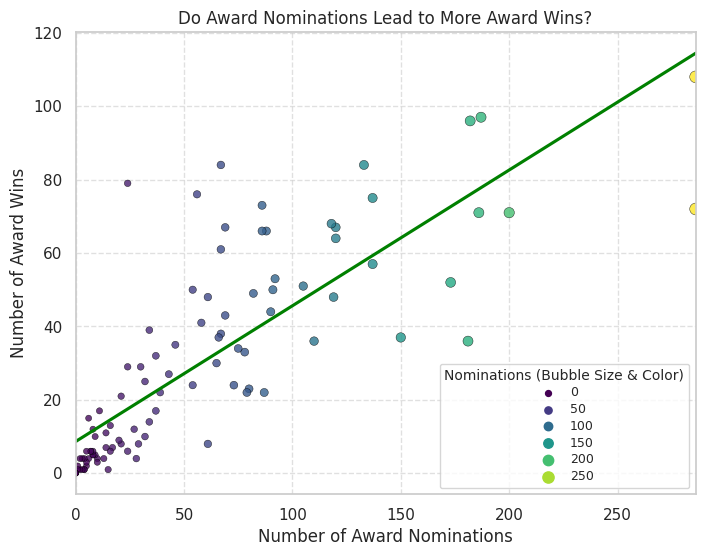

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_actors_nominations, x='number_award_nominations', y='number_award_wins',
                hue='number_award_nominations', size='number_award_nominations', palette='viridis', alpha=0.8, edgecolor='black')

sns.regplot(x=df_actors_nominations['number_award_nominations'],
            y=df_actors_nominations['number_award_wins'], scatter=False, color='green', ci=None)

plt.xlabel('Number of Award Nominations', fontsize=12)
plt.ylabel('Number of Award Wins', fontsize=12)
plt.title('Do Award Nominations Lead to More Award Wins?')
plt.legend(title="Nominations (Bubble Size & Color)",
           loc='lower right', labelspacing=0.3, fontsize=9,  title_fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

The above scatter plot visualizes the relationship between the number of award nominations and the number of award wins. Each point represents an actor who have worked in one of the 100 movies selected from imdb website, showing the award nominations an actor has recieved and awards won. The bubble size and color represent the number of nominations and a regression line (green) showing a clear upward trend. 

This scatterplot shows a strong positive correlation between nominations and wins suggesting that more nominations lead to more awards. Along with this it can be seen that most data points are clustered in the lower-left portion of the graph, indicating that most actors recieve few nominations and wins. On the other side, the outliers at the upper-right suggest that a few actors recieve an exceptionally high number of nominations and awards. 

Overall, it is known that this graphs supports the idea that getting nominated significantly increases the likelihood of winning an award. 

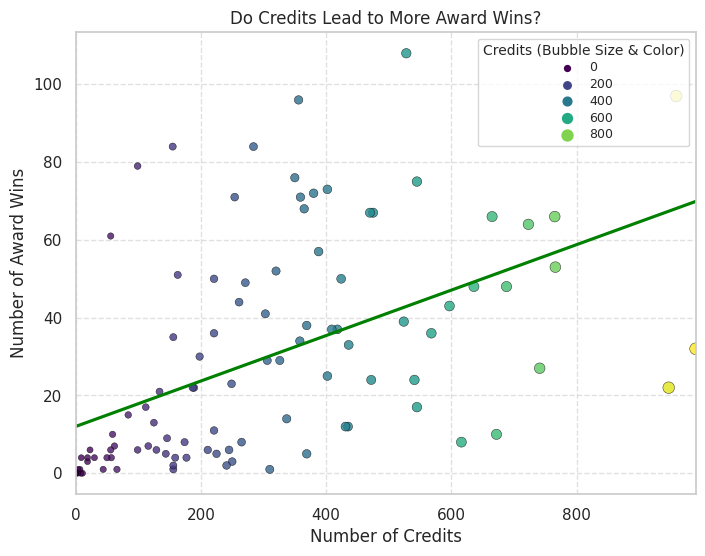

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_actors_credits, x='number_credits', y='number_award_wins',
                hue='number_credits', size='number_credits', palette='viridis', alpha=0.8, edgecolor='black')

sns.regplot(x=df_actors_credits['number_credits'],
            y=df_actors_credits['number_award_wins'], scatter=False, color='green', ci=None)

plt.xlabel('Number of Credits', fontsize=12)
plt.ylabel('Number of Award Wins', fontsize=12)
plt.title('Do Credits Lead to More Award Wins?')
plt.legend(title="Credits (Bubble Size & Color)", loc='upper right',
           labelspacing=0.3, fontsize=9,  title_fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

The above scatterplot examines whether the number of credits is related to the number of awards won. Each point represents an actor who have worked in one of the 100 movies selected from imdb website, showing the award nominations an actor has recieved and awards won. The bubble size and color represent the number of credits and a regression line (green) showing the overall trend.

This scatterplot shows a positive correlation, but it is noticeably weaker than in the previous graph. The points are more widely scattered representing that while there are some actors with many credits who have won numerous awards, others have not. While there are some actors with fewer credits and still have managed to have a significant number of wins, suggesting that quality and recognition seems to be a more important than quantity.

Overall, it is known that just working on many projects does not necessarily lead to more awards, industry recognition seems to be a more important factor. 

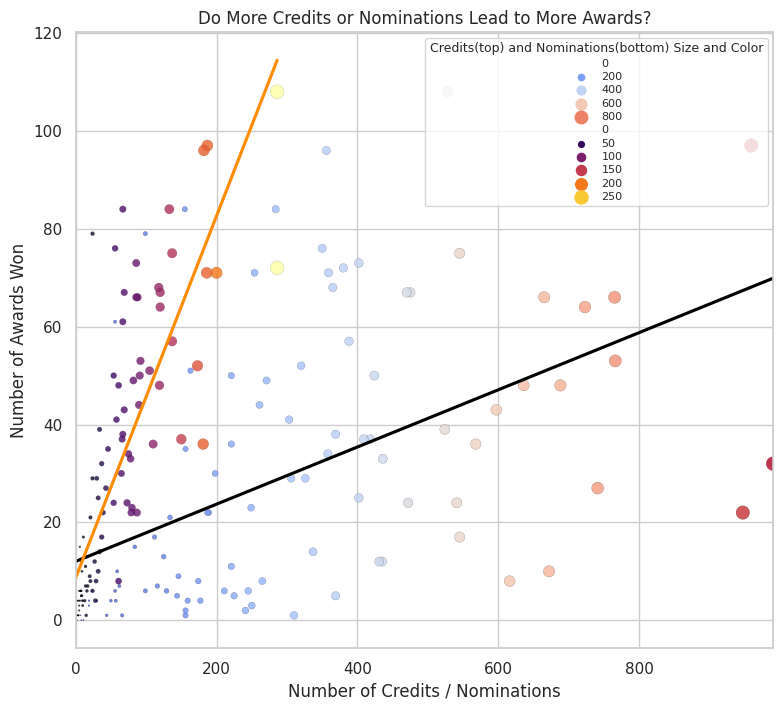

In [36]:
plt.figure(figsize=(9, 8))

sns.scatterplot(data=df_actors_credits, x='number_credits', y='number_award_wins', hue='number_credits',
                size='number_credits', palette='coolwarm', alpha=0.8, edgecolor='black', sizes=(0, 100))
sns.scatterplot(data=df_actors_nominations, x='number_award_nominations', y='number_award_wins', hue='number_award_nominations',
                size='number_award_nominations', palette='inferno', alpha=0.8, edgecolor='black', sizes=(0, 100))

sns.regplot(x=df_actors_credits['number_credits'],
            y=df_actors_credits['number_award_wins'], scatter=False, color='black', ci=None)
sns.regplot(x=df_actors_nominations['number_award_nominations'],
            y=df_actors_nominations['number_award_wins'], scatter=False, color='darkorange', ci=None)

plt.xlabel('Number of Credits / Nominations')
plt.ylabel('Number of Awards Won')
plt.title('Do More Credits or Nominations Lead to More Awards?')
plt.legend(loc='upper right', labelspacing=0.3, fontsize=8, title='Credits(top) and Nominations(bottom) Size and Color', title_fontsize=9)
plt.grid(True)

plt.show()

The above scatterplot compares both credits and nominations as predictors of award wins. Here the x-axis represents either credits or nominations, while the y-axis represents the number of awards won. Each point represents an actor who have worked in one of the 100 movies selected from imdb website, showing the award nominations an actor has recieved, achieved credits and awards won. 

The bubble size and color corresponds to either credits (light colors) or nominations (dark colors), allowing a direct visual comparison. In this graph, there are two trend lines drawn. Orange trend line (Nominations) shows how the number of nominations relates to wins, while Black trend line (Credits) shows how the number of credits relates to wins. 

The steeper slope of the orange trendline (nominations) indicates that nominations have much stronger correlation with wins than credits do. The gentle slope of the black trendline (credits) indicates that credits does not predict wins as well as nominations do. The spread for credits is wider showing greater variation that is some actors with many credits have won few awards, while others have been highly successful. The clustering of nominations towards higher awards reinforces that industry recognition through nominations plays a significant role in winning awards. 

## Conclusion

The project was based on the process of web scraping which allows us to get formatted data from public websites allowing one to get updated data over time. For this project, IMDB (Internet Movie Database) website was scraped to get data on atleast 100 movies and actors using BeautifulSoup, a Python library used for web scraping and parsing HTML. Those 100 actors should be among the ones who have worked in 100 movies chosen during web scraping. After scraping the data, general EDA is done to answer three in-depth questions based on the movies and actors datasets. 

To avoid extracting movie data from multiple sections of the website, we focused on genre-organzied webpages to gather all the necessary information. Similarly, for extracting actor data we targeted the webpages organized by actors and genres. For the movies dataset of 100 movies, each genre: Comedy, Horror, Action and Thriller - provided 25 links. The same way, for actors dataset of 100 actors, each actor-genre category provided 25 links. After gathering 200 links in total for movies and actors, using BeautifulSoup all the data was extracted and relevant feature list was updated. 

Once lists for each feature is assembled, two dataframes, one for movies and another for actors with these features as columns was created. In movie dataset, the genres and actors were split into separate columns as they were originally concatenated. 

For the EDA on the movies dataframe, unused 'duration' columns was dropped and checked for duplicates. Two 'None' value duplicates were replaced with zero. Most of the colummns datatypes were changed and extra characters were removed from 'gross_worldwide' and 'budget' columns. Lastly, a new column 'return' was created to calculate the ROI for each movie. 

For the EDA on the actors dataframe, there were no duplicated found. But, there were some 'None' values present in the dataset which were replaced with zero after changing the datatypes of 'number_award_nominations' and 'number_award_wons' columns. 

Fom our data analysis, we conclude that:

- Comedy genre was most the one which generated most sales of lower budget than action movies. In our data analysis we found out that comedy genre was most profitable. The return on Investments has been decreasing over decades. This could be due to rising TV industry or streaming services which is impacting traditional movie industry.

- The Pearson correlation also helped us to discover that a higher IMDB rating does not necessarily mean the movie is more popular. The higher rating can be due to quality of storytelling, director, critical acclaim, cultural impact or awards and recognition.

- Award nominations are the strongest predictor of award wins. Having more experience in different areas of the movie industry does not translate award wins. Thus, the analysis suggests that industry recognition due to award nominations plays an crucial role in securing awards and number of credits is not a reliable predictor of success. 

Thus, both datasets provided meaningful analysis but as both datasets only contains data of 100 movies and actors, any insights derived from it will be limited compared to real world. This can be mainly due to small sample size, selection bias, lack of all genre representation, and limited actor career data. 